In [1]:
import pandas as pd
from unidecode import unidecode
import re
import math

# Plotting tools
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

# Seaborn for plotting and styling
import seaborn as sns
sns.set(style="whitegrid")

In [2]:
path2files="yelp_dataset_challenge_academic_dataset/"
path2business=path2files+"yelp_academic_dataset_business.json"
path2reviews=path2files+"yelp_academic_dataset_review.json"

df_bus = pd.read_json(path2business, lines=True).set_index('business_id')
df_reviews = pd.read_json(path2reviews, lines = True).set_index('review_id')

In [3]:
df_bus.head()

,full_address,hours,open,categories,city,review_count,name,neighborhoods,longitude,state,stars,latitude,attributes,type
business_id,,,,,,,,,,,,,,
vcNAWiLM4dR7D2nwwJ7nCA,"4840 E Indian School Rd\nSte 101\nPhoenix, AZ ...","{'Tuesday': {'close': '17:00', 'open': '08:00'...",True,"[Doctors, Health & Medical]",Phoenix,7,"Eric Goldberg, MD",[],-111.983758,AZ,3.5,33.499313,{'By Appointment Only': True},business
JwUE5GmEO-sH1FuwJgKBlQ,"6162 US Highway 51\nDe Forest, WI 53532",{},True,[Restaurants],De Forest,26,Pine Cone Restaurant,[],-89.335844,WI,4.0,43.238893,"{'Take-out': True, 'Good For': {'dessert': Fal...",business
uGykseHzyS5xAMWoN6YUqA,"505 W North St\nDe Forest, WI 53532","{'Monday': {'close': '22:00', 'open': '06:00'}...",True,"[American (Traditional), Restaurants]",De Forest,16,Deforest Family Restaurant,[],-89.353437,WI,4.0,43.252267,"{'Take-out': True, 'Good For': {'dessert': Fal...",business
LRKJF43s9-3jG9Lgx4zODg,"4910 County Rd V\nDe Forest, WI 53532","{'Monday': {'close': '22:00', 'open': '10:30'}...",True,"[Food, Ice Cream & Frozen Yogurt, Fast Food, R...",De Forest,7,Culver's,[],-89.374983,WI,4.5,43.251045,"{'Take-out': True, 'Wi-Fi': 'free', 'Takes Res...",business
RgDg-k9S5YD_BaxMckifkg,"631 S Main St\nDe Forest, WI 53532","{'Monday': {'close': '22:00', 'open': '11:00'}...",True,"[Chinese, Restaurants]",De Forest,3,Chang Jiang Chinese Kitchen,[],-89.343722,WI,4.0,43.240875,"{'Take-out': True, 'Has TV': False, 'Outdoor S...",business


In [4]:
df_reviews.head()

,votes,user_id,stars,date,text,type,business_id
review_id,,,,,,,
15SdjuK7DmYqUAj6rjGowg,"{'funny': 0, 'useful': 2, 'cool': 1}",Xqd0DzHaiyRqVH3WRG7hzg,5,2007-05-17,dr. goldberg offers everything i look for in a...,review,vcNAWiLM4dR7D2nwwJ7nCA
RF6UnRTtG7tWMcrO2GEoAg,"{'funny': 0, 'useful': 2, 'cool': 0}",H1kH6QZV7Le4zqTRNxoZow,2,2010-03-22,"Unfortunately, the frustration of being Dr. Go...",review,vcNAWiLM4dR7D2nwwJ7nCA
-TsVN230RCkLYKBeLsuz7A,"{'funny': 0, 'useful': 1, 'cool': 1}",zvJCcrpm2yOZrxKffwGQLA,4,2012-02-14,Dr. Goldberg has been my doctor for years and ...,review,vcNAWiLM4dR7D2nwwJ7nCA
dNocEAyUucjT371NNND41Q,"{'funny': 0, 'useful': 0, 'cool': 0}",KBLW4wJA_fwoWmMhiHRVOA,4,2012-03-02,Been going to Dr. Goldberg for over 10 years. ...,review,vcNAWiLM4dR7D2nwwJ7nCA
ebcN2aqmNUuYNoyvQErgnA,"{'funny': 0, 'useful': 2, 'cool': 1}",zvJCcrpm2yOZrxKffwGQLA,4,2012-05-15,Got a letter in the mail last week that said D...,review,vcNAWiLM4dR7D2nwwJ7nCA


In [5]:
df = df_reviews.merge(df_bus, on = 'business_id')
df.head()

,votes,user_id,stars_x,date,text,type_x,business_id,full_address,hours,open,...,city,review_count,name,neighborhoods,longitude,state,stars_y,latitude,attributes,type_y
0,"{'funny': 0, 'useful': 2, 'cool': 1}",Xqd0DzHaiyRqVH3WRG7hzg,5,2007-05-17,dr. goldberg offers everything i look for in a...,review,vcNAWiLM4dR7D2nwwJ7nCA,"4840 E Indian School Rd\nSte 101\nPhoenix, AZ ...","{'Tuesday': {'close': '17:00', 'open': '08:00'...",True,...,Phoenix,7,"Eric Goldberg, MD",[],-111.983758,AZ,3.5,33.499313,{'By Appointment Only': True},business
1,"{'funny': 0, 'useful': 2, 'cool': 0}",H1kH6QZV7Le4zqTRNxoZow,2,2010-03-22,"Unfortunately, the frustration of being Dr. Go...",review,vcNAWiLM4dR7D2nwwJ7nCA,"4840 E Indian School Rd\nSte 101\nPhoenix, AZ ...","{'Tuesday': {'close': '17:00', 'open': '08:00'...",True,...,Phoenix,7,"Eric Goldberg, MD",[],-111.983758,AZ,3.5,33.499313,{'By Appointment Only': True},business
2,"{'funny': 0, 'useful': 1, 'cool': 1}",zvJCcrpm2yOZrxKffwGQLA,4,2012-02-14,Dr. Goldberg has been my doctor for years and ...,review,vcNAWiLM4dR7D2nwwJ7nCA,"4840 E Indian School Rd\nSte 101\nPhoenix, AZ ...","{'Tuesday': {'close': '17:00', 'open': '08:00'...",True,...,Phoenix,7,"Eric Goldberg, MD",[],-111.983758,AZ,3.5,33.499313,{'By Appointment Only': True},business
3,"{'funny': 0, 'useful': 0, 'cool': 0}",KBLW4wJA_fwoWmMhiHRVOA,4,2012-03-02,Been going to Dr. Goldberg for over 10 years. ...,review,vcNAWiLM4dR7D2nwwJ7nCA,"4840 E Indian School Rd\nSte 101\nPhoenix, AZ ...","{'Tuesday': {'close': '17:00', 'open': '08:00'...",True,...,Phoenix,7,"Eric Goldberg, MD",[],-111.983758,AZ,3.5,33.499313,{'By Appointment Only': True},business
4,"{'funny': 0, 'useful': 2, 'cool': 1}",zvJCcrpm2yOZrxKffwGQLA,4,2012-05-15,Got a letter in the mail last week that said D...,review,vcNAWiLM4dR7D2nwwJ7nCA,"4840 E Indian School Rd\nSte 101\nPhoenix, AZ ...","{'Tuesday': {'close': '17:00', 'open': '08:00'...",True,...,Phoenix,7,"Eric Goldberg, MD",[],-111.983758,AZ,3.5,33.499313,{'By Appointment Only': True},business


In [6]:
def preprocess(text):
    # Remove accents
    text = unidecode(text)
    # Remove line breaks and tab
    text = re.sub(r'[\t\n\r]', ' ', text)
    # Remove http links
    text = re.sub(r'http\S+', ' ', text)
    # Remove leading and trailing spaces
    text = text.strip()
    return text
df.text_processed = df.text.apply(lambda x : preprocess(x))

C:\Users\xyh\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  # This is added back by InteractiveShellApp.init_path()


In [7]:
dish_list = pd.read_csv('student_dn_annotations.txt', header = None, names = ['dish'])
dish_list=dish_list[:200]
dish_list

,dish
0,bisi bele bath
1,margherita pizza
2,penne
3,carbonara spaghetti
4,olive green
...,...
195,beef rice
196,dimsum
197,indian cuisine
198,agghiotta di lumache


In [8]:
dish_list['review_count'] = dish_list.dish.apply(lambda x : (df.text_processed.str.contains(x)).sum())


In [9]:
dish_list.sort_values('review_count', ascending=False)

,dish,review_count
114,cheese,88862
8,asti,75818
123,buffet,36233
157,sweet potato,8879
10,margaritas,5922
...,...,...
71,filetti di baccalà,0
69,bhakri,0
66,chen wok,0
65,masala puri,0


In [23]:
dish_list_top_30=dish_list.sort_values('review_count', ascending=False)[:20]
dish_list_top_30

,dish,review_count,restaurant_count,review_restaurant_ratio,average_review
114,cheese,88862,11449,7.761551,3.761473
8,asti,75818,17277,4.388378,3.971432
123,buffet,36233,3055,11.860229,3.534044
157,sweet potato,8879,1750,5.073714,3.886361
10,margaritas,5922,1176,5.035714,3.686424
24,basil,5570,1834,3.037077,3.973070
16,pulled pork,4443,1047,4.243553,3.763898
17,cream cheese,4362,1747,2.496852,3.802384
80,parmesan,3402,1361,2.499633,3.820694
31,gluten free,3040,1473,2.063815,4.088487


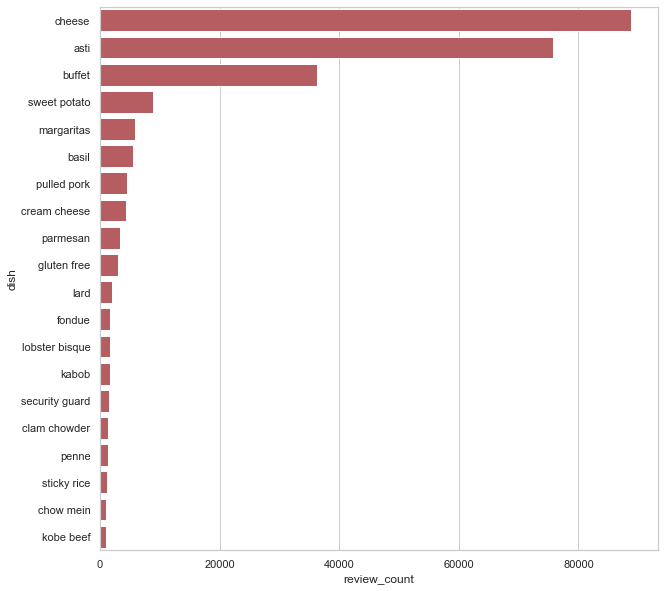

In [17]:
plt.figure(figsize=(10,10))
sns.barplot(x='review_count', y='dish', data = dish_list.sort_values('review_count', ascending=False)[:20], color='r')
plt.savefig("week4_1.png")

In [18]:

dish_list['restaurant_count'] = dish_list.dish.apply(lambda x : df[df.text_processed.str.contains(x)].business_id.unique().shape[0])
dish_list['review_restaurant_ratio'] = dish_list.review_count / dish_list.restaurant_count
dish_list.sort_values('review_restaurant_ratio', ascending=False)

,dish,review_count,restaurant_count,review_restaurant_ratio
123,buffet,36233,3055,11.860229
114,cheese,88862,11449,7.761551
40,fondue,1695,304,5.575658
77,feta fries,83,15,5.533333
59,lobster bisque,1605,313,5.127796
...,...,...,...,...
183,slattato,0,0,NaN
185,baccalà alla vicentina,0,0,NaN
187,canestrato pugliese,0,0,NaN
190,coda alla vaccinara,0,0,NaN


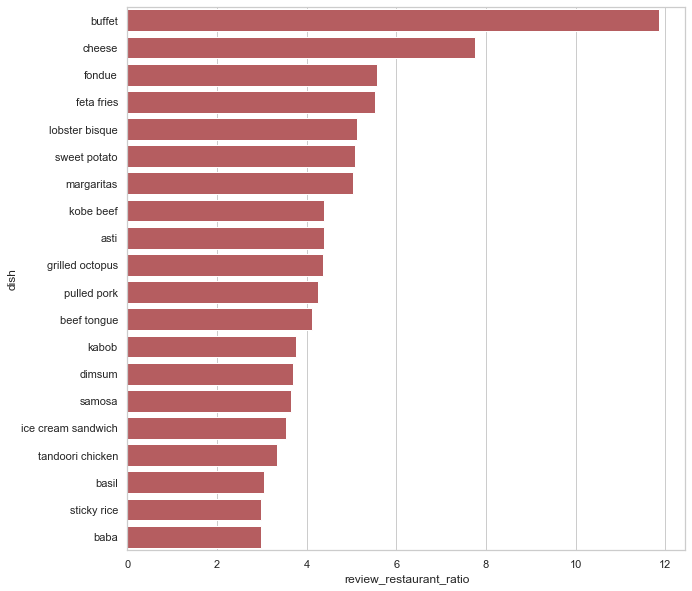

In [20]:
plt.figure(figsize=(10,10))
data = dish_list.sort_values('review_restaurant_ratio', ascending=False)[:20]
sns.barplot(x='review_restaurant_ratio', y='dish', data = data, color='r')
plt.savefig("week4_2.png")

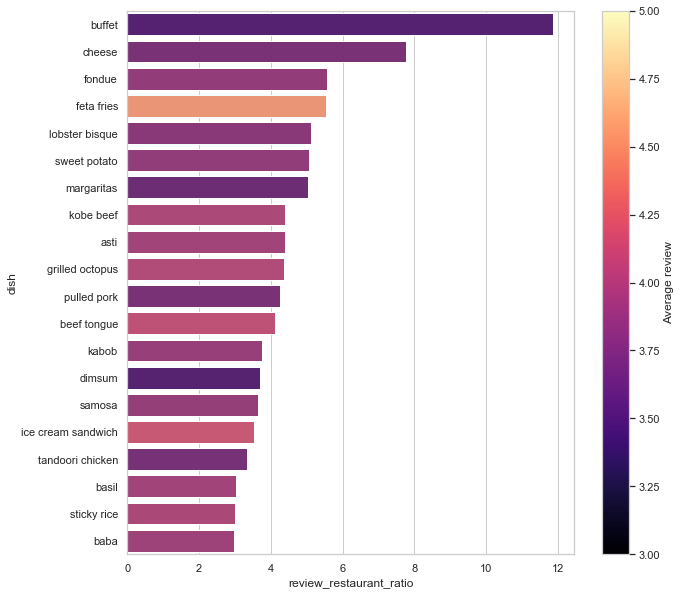

In [22]:
dish_list['average_review'] = dish_list.dish.apply(lambda x : df[df.text_processed.str.contains(x)].stars_x.mean())
plt.figure(figsize=(10,10))
data = dish_list.sort_values('review_restaurant_ratio', ascending=False)[:20]

norm = plt.Normalize(math.floor(data.average_review.min()), math.ceil(data.average_review.max()))
cmap = plt.get_cmap("magma")
ax = sns.barplot(x='review_restaurant_ratio', y='dish', data = data, palette=cmap(norm(data.average_review.values)))
cbar = ax.figure.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
cbar.set_label('Average review')
plt.savefig("week4_3.png")

In [25]:
columns_dict = {'mean':'Average stars', 'count':'Number of reviews', 'name':'Restaurant name'}
tmp = df[df.text_processed.str.contains('buffet')].groupby(['business_id', 'name'])
tmp = tmp['stars_x'].agg(['mean', 'count']).reset_index().rename(columns=columns_dict).sort_values(by=['Average stars', 'Number of reviews'], ascending = False)

In [26]:
tmp[tmp['Number of reviews'] > 10]

,business_id,Restaurant name,Average stars,Number of reviews
1387,RhbOa-Ft3sZB4B_1j5LfyA,Mr. Mama's,4.812500,16
361,6UXw7_U13Th0PZlMXZbjMg,American Express Centurion Lounge,4.720000,25
1750,ZP6qFq7LUh6Tr7WHPoOW6g,eat.,4.636364,11
1302,Pv2rMFCO9e6i0jJhmOEdjQ,Tix4Tonight Fashion Show Mall,4.615385,13
134,1yx2zLskVTe5WQdYjL2Apw,Egg & I,4.612903,31
...,...,...,...,...
61,0InQd9vuhRc98OksC3Ks8Q,Buffet Roundtable,2.039062,128
1434,Sqo1BQUqcV4goQEeWsDMsQ,Sahara Buffet,1.933333,30
1536,UuBZkKnckkRmYt3jFn2gaQ,Circus Buffet,1.822222,90
2066,f2eVsiYVUuDKElCP_tMEcw,BJ's Buffet,1.666667,15


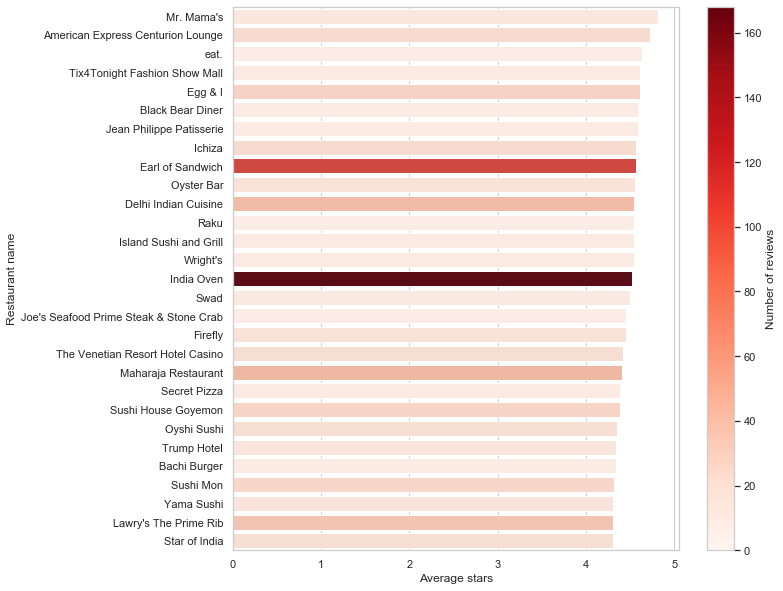

In [28]:
plt.figure(figsize=(10,10))
data = tmp[tmp['Number of reviews'] > 10][:30]

norm = plt.Normalize(0, math.ceil(data['Number of reviews'].max()))
cmap = plt.get_cmap("Reds")
ax = sns.barplot(x='Average stars', y='Restaurant name', data = data, palette=cmap(norm(data['Number of reviews'].values)))
cbar = ax.figure.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
cbar.set_label('Number of reviews')
plt.savefig("week4_4.png")